In [1]:
import pandas as pd
path = 'data/pima-indians-diabetes.data'
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv(path, header=None, names=col_names)

In [2]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age']
x = pima[feature_cols]
y = pima.label

In [5]:
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [6]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [7]:
y_pred_class = logreg.predict(x_test)

In [8]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.6927083333333334


**Null Accuracy**

In [9]:
y_test.value_counts()

0    130
1     62
Name: label, dtype: int64

In [10]:
#Percentage of ones
y_test.mean()

0.3229166666666667

In [11]:
#Percentage of Zeros
1 - y_test.mean()

0.6770833333333333

In [12]:
#Null accuracy
max(y_test.mean(), 1 - y_test.mean())

0.6770833333333333

In [13]:
y_test.value_counts().head(1)/len(y_test)

0    0.677083
Name: label, dtype: float64

**Comparing true and predicted response value**

In [14]:
print('True:', y_test.values[0:25])
print('Pred:', y_pred_class[0:25])

True: [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
Pred: [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


## Confusion matrix

In [15]:
print(metrics.confusion_matrix(y_test, y_pred_class))

[[118  12]
 [ 47  15]]


In [16]:
print('True:', y_test.values[0:25])
print('Pred:', y_pred_class[0:25])

True: [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
Pred: [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [17]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [18]:
#Classification Accuracy
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.6927083333333334
0.6927083333333334


In [19]:
#Classification Error
print((FP + FN)/float(TP + TN + FP + FN))
print(1-metrics.accuracy_score(y_test, y_pred_class))

0.3072916666666667
0.30729166666666663


In [20]:
#Sensitivity
print(TP/float(TP + FN))
print(metrics.recall_score(y_test, y_pred_class))

0.24193548387096775
0.24193548387096775


In [21]:
#Specificity
print(TN/float(TN + FP))

0.9076923076923077


In [22]:
#False Positive Rate
print(FP/float(TN + FP))

0.09230769230769231


In [23]:
#Precision
print(TP/float(TP + FP))
print(metrics.precision_score(y_test, y_pred_class))

0.5555555555555556
0.5555555555555556


## Adjusting the classification threshold

In [24]:
logreg.predict(x_test)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [25]:
logreg.predict_proba(x_test)[0:10, :]

array([[0.63247571, 0.36752429],
       [0.71643656, 0.28356344],
       [0.71104114, 0.28895886],
       [0.5858938 , 0.4141062 ],
       [0.84103973, 0.15896027],
       [0.82934844, 0.17065156],
       [0.50110974, 0.49889026],
       [0.48658459, 0.51341541],
       [0.72321388, 0.27678612],
       [0.32810562, 0.67189438]])

In [26]:
y_pred_prob = logreg.predict_proba(x_test)[: , 1]
print(y_pred_prob)

[0.36752429 0.28356344 0.28895886 0.4141062  0.15896027 0.17065156
 0.49889026 0.51341541 0.27678612 0.67189438 0.35755557 0.74087965
 0.36050235 0.23012363 0.42654231 0.19103515 0.45763601 0.1190141
 0.43928953 0.36961151 0.44187989 0.37611662 0.19816022 0.41677304
 0.15548281 0.2531671  0.09743077 0.69633712 0.15358309 0.2197836
 0.43094832 0.34216058 0.22396114 0.38073543 0.13342134 0.38790216
 0.47049703 0.16204743 0.29548176 0.30918161 0.27299705 0.38816583
 0.27353443 0.28881041 0.63471914 0.02365251 0.15820648 0.23018375
 0.3484593  0.27580041 0.33264104 0.24880596 0.74489512 0.39001464
 0.41625545 0.13575687 0.18895376 0.64777682 0.18922131 0.05685904
 0.63991547 0.46636382 0.1250972  0.26957602 0.24919104 0.30570396
 0.46376224 0.20963095 0.42847829 0.40762264 0.20169096 0.27027066
 0.26255856 0.57238263 0.45467041 0.27716152 0.58001281 0.41599488
 0.27276101 0.34099223 0.54626578 0.37930723 0.2992205  0.10059169
 0.32872602 0.45101363 0.16036979 0.4896975  0.63230508 0.407384

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

Text(0,0.5,'Frequency')

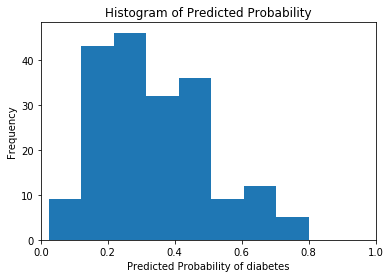

In [28]:
plt.hist(y_pred_prob, bins=8)
plt.xlim(0,1)
plt.title('Histogram of Predicted Probability')
plt.xlabel('Predicted Probability of diabetes')
plt.ylabel('Frequency')

In [29]:
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], 0.3)[0]

In [30]:
y_pred_prob[0:10]

array([0.36752429, 0.28356344, 0.28895886, 0.4141062 , 0.15896027,
       0.17065156, 0.49889026, 0.51341541, 0.27678612, 0.67189438])

In [31]:
y_pred_class[0:10]

array([1., 0., 0., 1., 0., 0., 1., 1., 0., 1.])

In [32]:
print(confusion)

[[118  12]
 [ 47  15]]


In [34]:
#new confusion matrix (threshold of 0.3)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[80 50]
 [16 46]]


In [35]:
#Increased sensitivity(used to be 0.24)
print(46 / float(46 + 16))

0.7419354838709677


In [36]:
#Decreased specificity(used to be 0.91)
print(80 / float(80 + 50))

0.6153846153846154
